In [2]:
import numpy as np
from tensorflow.keras.models import Sequential   # 모델 객체 생성
from tensorflow.keras.layers import Dense, Input # 모델 layer 쌓을 때 필요한 함수
import matplotlib.pyplot as plt

In [4]:
# 1. dataset
x_data = np.array([[0, 0], 
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0], 
                   [1], 
                   [1], 
                   [0]])
# 2. 모델 구성
model = Sequential()
# model.add(Input(shape = 2))
model.add(Dense(units = 10,
                input_shape = (2,), # input_dim = 2,
                activation = 'relu'))
model.add(Dense(units = 20,
                activation = 'relu')) # 은닉층(hidden layer)에서는 input_shape을 X
model.add(Dense(units = 10,
                activation = 'relu'))
model.add(Dense(units = 1,
                activation = 'sigmoid'))
print(model.summary())
# 3. 모델 학습과정 설정
# model.compile(loss = 'mse',
#               optimizer = 'adam',
#               metrics = ['mae']) # 회귀식에서 학습과정 설정
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['binary_accuracy']) # 2진분류
# model.compile(loss = 'categorical_crossentropy',
#               optimizer = 'adam',
#               metrics = ['accuracy']) # 다중분류

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                30        
                                                                 
 dense_5 (Dense)             (None, 20)                220       
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
# 4. 학습
hist = model.fit(x_data, y_data,
                 epochs = 100,
                 verbose = 2)

Epoch 1/100
1/1 - 0s - loss: 0.7324 - binary_accuracy: 0.5000 - 479ms/epoch - 479ms/step
Epoch 2/100
1/1 - 0s - loss: 0.7301 - binary_accuracy: 0.2500 - 0s/epoch - 0s/step
Epoch 3/100
1/1 - 0s - loss: 0.7278 - binary_accuracy: 0.2500 - 3ms/epoch - 3ms/step
Epoch 4/100
1/1 - 0s - loss: 0.7255 - binary_accuracy: 0.2500 - 2ms/epoch - 2ms/step
Epoch 5/100
1/1 - 0s - loss: 0.7233 - binary_accuracy: 0.2500 - 10ms/epoch - 10ms/step
Epoch 6/100
1/1 - 0s - loss: 0.7213 - binary_accuracy: 0.2500 - 3ms/epoch - 3ms/step
Epoch 7/100
1/1 - 0s - loss: 0.7194 - binary_accuracy: 0.2500 - 4ms/epoch - 4ms/step
Epoch 8/100
1/1 - 0s - loss: 0.7176 - binary_accuracy: 0.2500 - 15ms/epoch - 15ms/step
Epoch 9/100
1/1 - 0s - loss: 0.7158 - binary_accuracy: 0.2500 - 16ms/epoch - 16ms/step
Epoch 10/100
1/1 - 0s - loss: 0.7140 - binary_accuracy: 0.2500 - 17ms/epoch - 17ms/step
Epoch 11/100
1/1 - 0s - loss: 0.7123 - binary_accuracy: 0.2500 - 16ms/epoch - 16ms/step
Epoch 12/100
1/1 - 0s - loss: 0.7108 - binary_accur

Epoch 96/100
1/1 - 0s - loss: 0.5914 - binary_accuracy: 1.0000 - 0s/epoch - 0s/step
Epoch 97/100
1/1 - 0s - loss: 0.5894 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step
Epoch 98/100
1/1 - 0s - loss: 0.5874 - binary_accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 99/100
1/1 - 0s - loss: 0.5854 - binary_accuracy: 1.0000 - 0s/epoch - 0s/step
Epoch 100/100
1/1 - 0s - loss: 0.5833 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


In [7]:
# 5. 학습과정 보기 및 평가
hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])

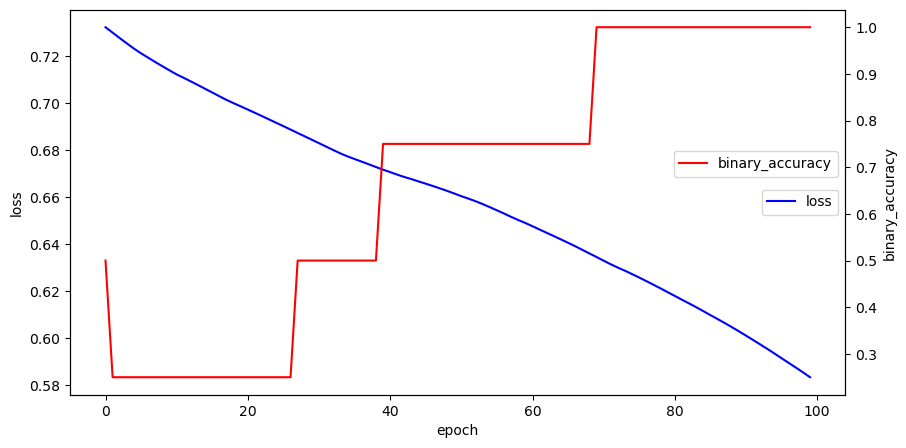

In [16]:
fig, loss_ax = plt.subplots(figsize = (10, 5))
loss_ax.plot(hist.history['loss'],'b', label = 'loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax
acc_ax.plot(hist.history['binary_accuracy'], 'r', label = 'binary_accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('binary_accuracy')

loss_ax.legend(loc = 'center right')
acc_ax.legend(bbox_to_anchor = (0.999, 0.65))
plt.show()

In [18]:
# 모델 평가하기
score = model.evaluate(x_data, y_data)
print('loss:', score[0])
print('accuracy:', score[1])

1/1 [==============================] - 0s 25ms/step - loss: 0.5812 - binary_accuracy: 1.0000
loss: 0.5811936855316162
accuracy: 1.0


In [21]:
# 예측
int(model.predict(np.array([[0, 1]])).round())

1/1 [==============================] - 0s 41ms/step


1

In [29]:
9 in [1, 2, 3, 4, 5] # 나열가능한 자료

False

In [32]:
# 리스트에 0과 1만 들어있는지 여부
temp = [0, 1, 2]
print(all([x in (0, 1) for x in temp]))
print(all(x in (0, 1) for x in temp))

False
False


In [44]:
# 독립변수 2개(0 0, 0 1, 1 0, 1 1)를 입력받아 예측값을 출력(종료는 수를 1개만 입력할 때)
while True:
    input_str = input('space로 분리해서 0또는 1을 2개 입력(한개만 입력하면 종료됩니다)') 
    # ' 0  1 ' => '0  1' => '0','1'
    input_list = input_str.strip().split()
    input_nums = list(map(int, input_list)) # [0, 1]
    if len(input_nums) == 1:
        print('데이터를 하나만 입력할 경우 종료됩니다. Bye~')
        break
    if all(x in [0, 1] for x in input_nums): # 0과 1만 입력한 경우
        input_data = np.array(input_nums[:2]).reshape(-1, 2)
        print('입력값:', input_nums[0], input_nums[1])
        print('예측값:', int(model.predict(input_data).round()))
    else:
        print('0과 1만 입력하셔야 예측값을 볼 수 있습니다')

space로 분리해서 0또는 1을 2개 입력(한개만 입력하면 종료됩니다)0 10
0과 1만 입력하셔야 예측값을 볼 수 있습니다
space로 분리해서 0또는 1을 2개 입력(한개만 입력하면 종료됩니다)10 10
0과 1만 입력하셔야 예측값을 볼 수 있습니다
space로 분리해서 0또는 1을 2개 입력(한개만 입력하면 종료됩니다)0 1
입력값: 0 1
1/1 [==============================] - 0s 16ms/step
예측값: 1
space로 분리해서 0또는 1을 2개 입력(한개만 입력하면 종료됩니다)1
데이터를 하나만 입력할 경우 종료됩니다. Bye~


# 2. AND

In [45]:
import numpy as np
from tensorflow.keras.models import Sequential 

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 50000)             150000    
                                                                 
 dense_63 (Dense)            (None, 20)                1000020   
                                                                 
 dense_64 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,150,041
Trainable params: 1,150,041
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1/1 [==============================] - 1s 617ms/step - loss: 0.6924 - binary_accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 39ms/step - loss: 0.5755 - binary_accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 28ms/step - loss: 0.4975 - binary_acc

1/1 [==============================] - 0s 14ms/step - loss: 2.4955e-04 - binary_accuracy: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 11ms/step - loss: 2.3218e-04 - binary_accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 2ms/step - loss: 2.2200e-04 - binary_accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 6ms/step - loss: 2.0372e-04 - binary_accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 16ms/step - loss: 1.9596e-04 - binary_accuracy: 1.0000
Epoch 75/100
1/1 [==============================] - 0s 13ms/step - loss: 1.8931e-04 - binary_accuracy: 1.0000
Epoch 76/100
1/1 [==============================] - 0s 10ms/step - loss: 1.7253e-04 - binary_accuracy: 1.0000
Epoch 77/100
1/1 [==============================] - 0s 4ms/step - loss: 1.6016e-04 - binary_accuracy: 1.0000
Epoch 78/100
1/1 [==============================] - 0s 17ms/step - loss: 1.5070e-04 - binary_accuracy: 1.0000
Epoch 79/100
1/1 [========

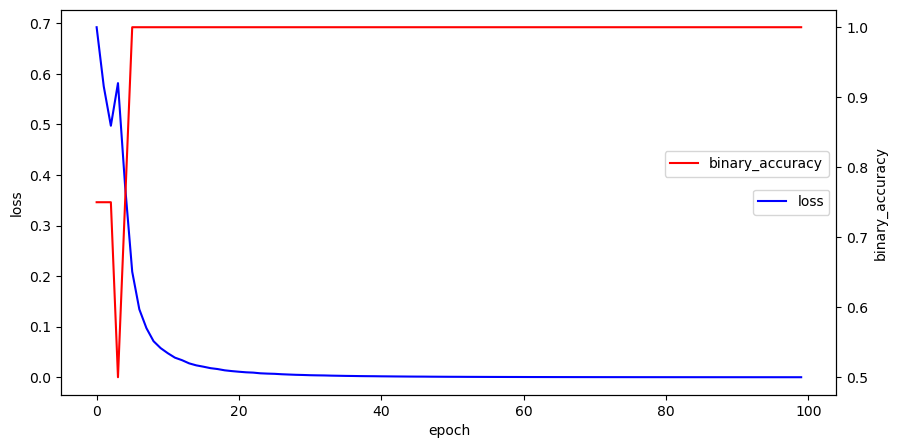

1/1 [==============================] - 0s 134ms/step - loss: 3.6702e-05 - binary_accuracy: 1.0000
loss: 3.670234582386911e-05
accuracy: 1.0
1/1 [==============================] - 0s 66ms/step


1

In [66]:
# 1. dataset
x_data = np.array([[0, 0], 
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0], 
                   [0], 
                   [0], 
                   [1]])
# 2. model 구성
model = Sequential()
model.add(Dense(units = 50000,
                input_shape = (2, ), 
                activation = 'relu'))
model.add(Dense(units = 20,
                activation = 'relu'))
model.add(Dense(units = 1,
                activation = 'sigmoid'))
print(model.summary())
# 3. model 학습과정(이진분류)
model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['binary_accuracy'])
# 4. training
hist = model.fit(x_data, y_data,
                 epochs = 100,
                 verbose = 1)
# 5. 학습과정 살펴보기 및 평가(evaluate)
print(hist.history.keys())
fig, loss_ax = plt.subplots(figsize = (10, 5))
loss_ax.plot(hist.history['loss'], 'b', label = 'loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['binary_accuracy'], 'r', label = 'binary_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('binary_accuracy')

loss_ax.legend(loc = 'center right')
acc_ax.legend(bbox_to_anchor = (0.999, 0.65))
plt.show()

# 6. 예측하기: np.array([[0,1]])를 예측하기
score = model.evaluate(x_data, y_data)
print('loss:', score[0])
print('accuracy:', score[1])
int(model.predict(np.array([[1, 1]])).round())